In [ ]:
# Supervised Learning i bu gün bitiriyoruz.Adaboost-Gbm-xgboost tan bahsedeceğiz bu gün

# Ensemble modellerde 2 yaklaşım vardı. Bagging ve Boosting
# baggingde;
# 100 tane küçük modelimiz varsa bunların her birinden bir data kümesini oluşturarak aggregating yapılıyor.
# Regression ise 100 modelin ortalaması alınıyor, Classification da oylama yapıyordu
# Orion Hoca: bagging kapalı oylama boosting kopyacı sınıf

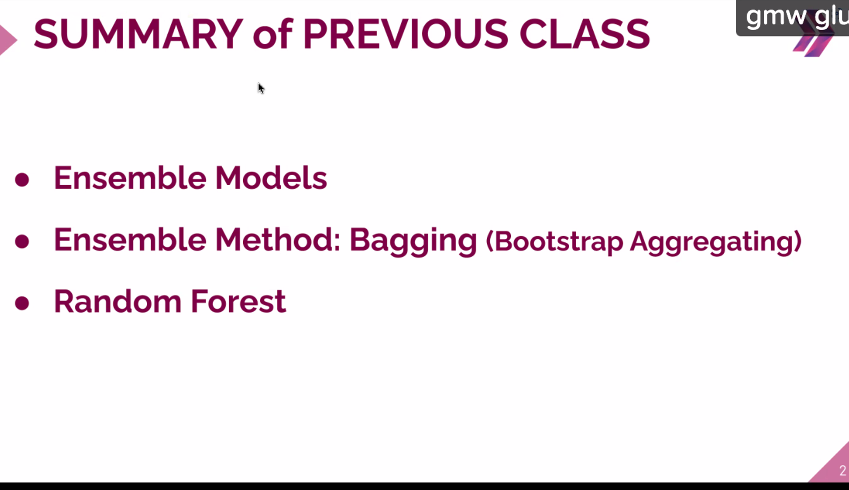

In [ ]:
# Supervised modeller
# Alttakileri görmüştük supervised learning adı altında
# Çoğu yöntem eski ama tree based modeller advanced yöntemler ve son 10-20 yıl içinde çıkmış yöntemler

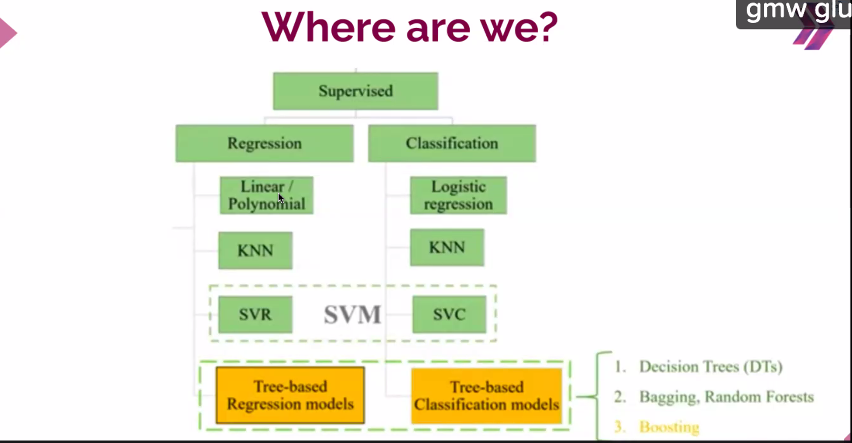

In [ ]:
# Internette buna benzer şeyler görebiliriz
# Naive Bayes: Çok kullanıldığını görmedim. Olasılık tabanlı yöntem(John hoca)
# Gaussian : Bunu görmeyeceğiz ama çok kullanıldığını görmedim. Computer vision da vs karşılaştığımız yöntem(John hoca)
# PCA(Principal Component Analysis) : Bu işin en klasiklerindendir. Bunu göreceğiz

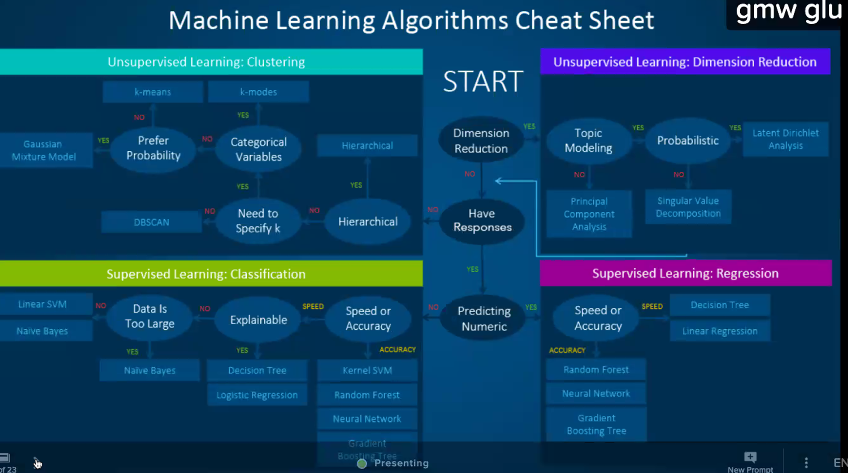

In [ ]:
# Dünkü derstede vardı bu tablo
# Bir model bir önceki modelin sonucundan yola çıkarak bir şey yapıyor(Boosting),
# Her bir modelin katkısına göre ağırlıkları değişiyor(Bootsing)
# Temel olarak Adaboost, gbm,xgboost u göreceğiz

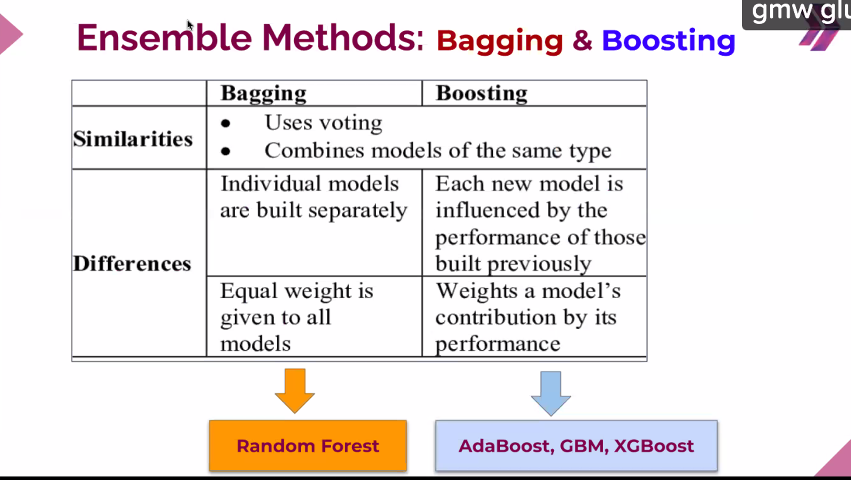

In [ ]:
# Can overfit            : XGboost overfit i biraz daha engeller
# Reducre bias variance  : Bias ve variance ı azaltırlar
# Sequential Classifiers : Seri şeklinde bağlanmış demiştik

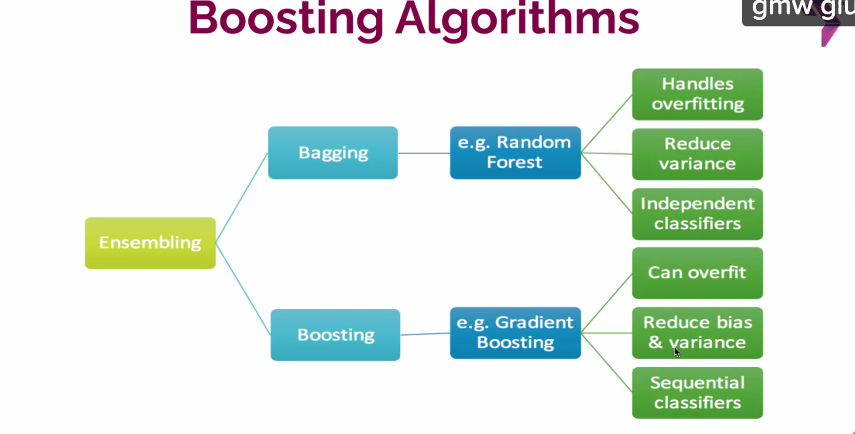

In [ ]:
# Data modele giriyor sonra şekil değiştiriyor sonra o data modele girip şekil değiştiriyor sonra diğer modele ....
# .. bu şekilde devam ediyor. Bunlara weak learner deniyor çünkü bir tane dal var. Strong learner: kendi başına karar veren modeller
# .. weak learner da bir çok weak learner bir araya gelerek güçlü bir model ortaya çıkarıyor
# .. Bir modelde bir hata alıyor sonra o hatalara göre(ürettiği sonuca göre) performansını arttırmak için o bir şeyler yapıyor
# .. bu yüzden boosting deniyor yani birbirlerini ateşleme ...

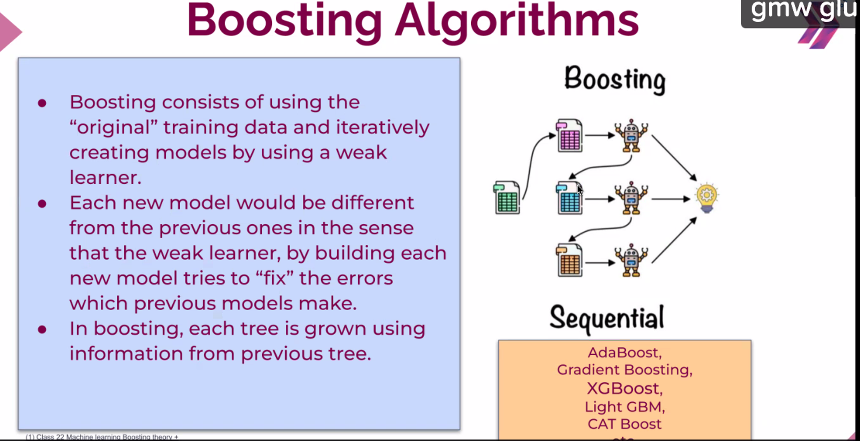

In [ ]:
# ADABOOST
# Boosting algoritmalarının ilk çıkan yöntemlerden birisi
# Boosting yapıyor bunu adaptive şekilde yapıyor
# Günümüzde Xgboost ve gradient boost kullanıyor. Ama bunu bilmekte de fayda var
# * Adaboost stamp kullanıyor. Yani en zayıfını kullanıyor(Adaboost u diğerlerinden ayıran)
# * Modelimiz bir classification yapıyor ve belli bir yerden ayırıyor
# Solda kırmızılar ayrılmış, sağda maviler var ama kırmızılarda var. 3 hatalı sınıflandırma var(Sol alttaki şekil)
# .. Bu 3 hataya bir ağırlık verip bir sonraki modele gönderiyor. Bir sonraki model hangilerinin hatalı olduğunu biliyor
# .. Bu ayırma sonucunda bu bir hata alıyor. Bir sonraki modelde bu modelin hatasını buluyor.
# .. Sonra sonraki model 3 tane sınıfı doğru sınıflayacak şekilde bir ayırma yapıyor(2. şekil)
# .. Ancak hala hatalar var (sağ üstteki mavi ve sol alttaki kırmızılar) .. Bunları belirleyip
# .. bir sonraki modele gönderiyor(En sağ attaki modele) 
# Sonuç olarak modeller kendileri hatalar yapıyor. Bir sonraki modele gidiyor o model hataları düzeltip bir 
# .. sonraki modele gidiyor vs .. En son bir karar yüzeyi oluşuyor

# Class chat soru : hocam weak learner dediğimiz şey her bir stump mı oluyor -- > Evet


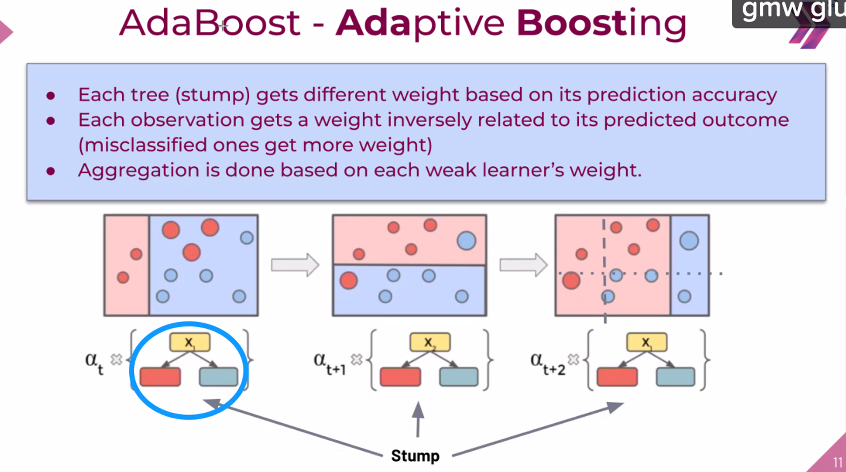

###### Orion Hoca:
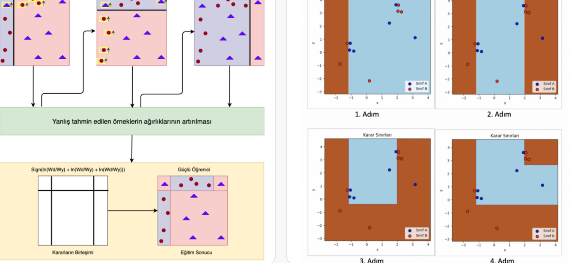

In [ ]:
# Base_estimator : None ise DecisionTreeClassifier kullanır yoksa kendimiz belirlemeliyiz
# n_estimator    : Kaç tane stump kullanacağımızı belirleme

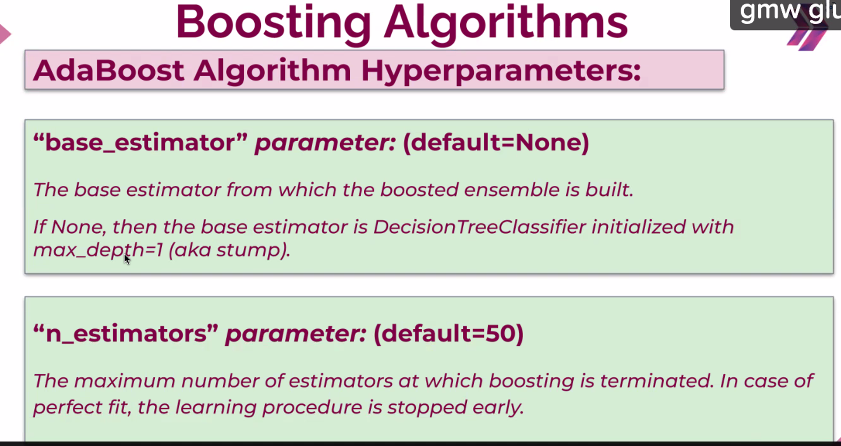

In [ ]:
# GRADIENT BOOSTING MACHINE
# Daha gelişmiş bir yöntem Adaboost a göre
# Bu da bir önceki modelin hatasını düzeltiyor
# Buradaki kritik nokta. X,y datamız giriyor.. train yapıyor. prediction yapıyor. hata buluyor
# .. Bir sonraki modele hata giriyor. Artık bizim labelımız/targetlerımız(y) "hatalar"(r2) oluyor . 2. modelde bir hata buluyor
# .. Sonra diğer modelde label ı "hatalar"(r3) oluyor vs vs
# Her bir ağaç stumptan daha büyük olabilir

# Class chat soru: residual lar bir sonraki modelin target label'i oluyor diyebilir miyiz? --> orion hoca: Evet
# Orion Hoca: Bu residuallere "pseudo residual" denir

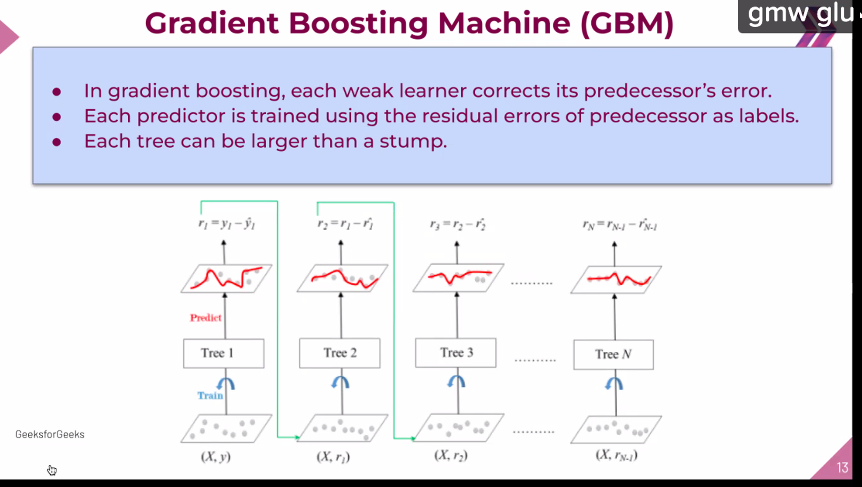

In [ ]:
# Learning Rate-Öğrenme hızı: Bu bir hyperparametredir.
# Hatayı biz neden bir parabolle gösteriririz.Çünkü hata fonksiyonumuz (y-yhead)**2 idi. Bunu çizdirirsek parabol çıkar 
# Orion Hoca: convex bir yapıda olursa hatanın bulunması kolay. o yüzden mümkün olduğu kadar cost funksiyonlar convex yapıyı sağlamaya çalışır
# Amacımız hatayı minimize etmek. Yani eğer eğim x eksenine paralel olursa hata/eğim sıfır olur
# Şimdi biz her bir işlem adımında global minimuma(türevin sıfır olduğu yere/eğimin sıfır olduğu yere) giderken belli adımda gitmek isteriz yani 
# .. learning rate in hızını buna göre ayarlamalıyız.
# Learning rate hızlı olursa bu minimumu es geçer.Yani ortadaki şekildeki gibi eğrinin sağındaki mavi noktadan altı dolanıp eğimin solundaki mavi noktaya atlar
# .. Böylece hatanın minimum olduğu yeri kaçıracaktır ve sonra tekrar geriye dönecektir ama learning rate
# .. yüksek olduğundan dolayı bu sefer soldaki mavi noktadan sağdaki bir mavi noktaya atlayacaktır
# ... Orion Hoca: Çok fazla seçerseniz overshoot olursunuz. ordan oraya sekersiniz
# Yavaş olursa maliyet artar ve hatayı bir türlü minimize edemeyiz. 50. ağaca geldiğimizde hata hala yüksektir
# Bu sebeplerden dolayı learning rate ne büyük ne küçük olmalı. Optimum bir learning rate bulmalıyız/seçmeliyiz
# Optimizasyonu yapan gradient descenttir

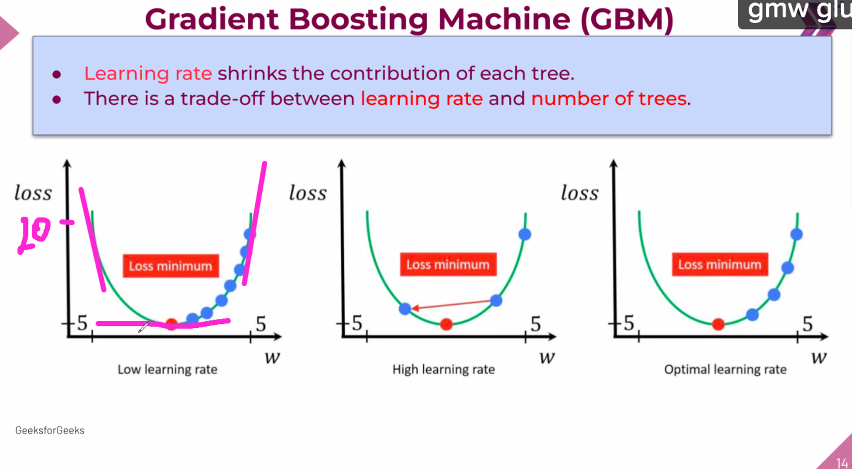

###### Orion Hoca Student Zone
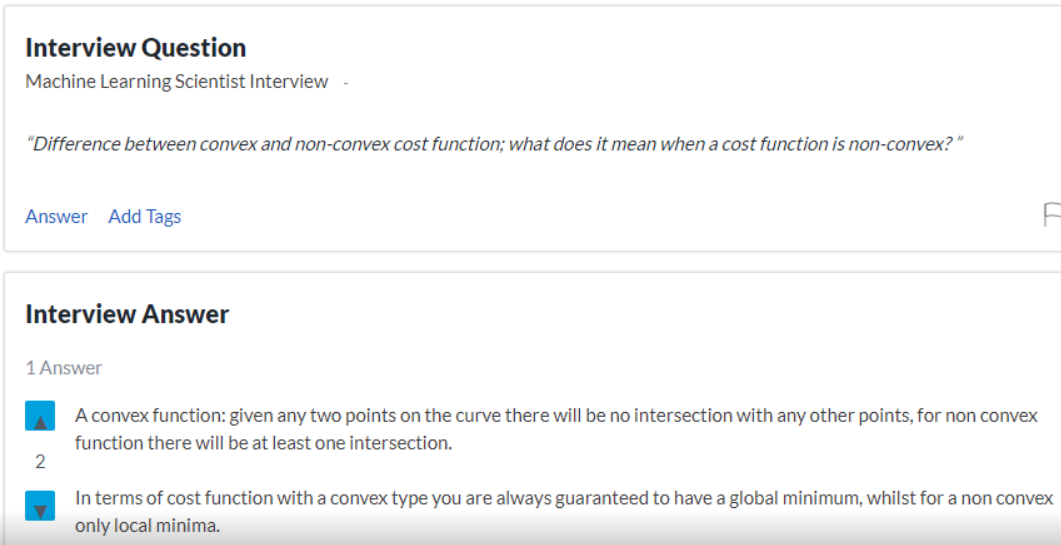

In [ ]:
# XGBOOST
# Gradient descent i biraz daha geliştirmişler
# Gradient boosting e göre avantajları
    # En önemli avantajımız burada performans ve hız()
    # İçinde Cross validation yapma imkanı var
    # missing dataları handle edebiliyor
        # Orion Hoca: hade iyiyiz missig value ile uğraşmadan şöyle bir dataya bakıyım dediğinizde xgboost ile bunu yapabileceksiniz
    # overfitting den kaçınmak için kendi içinde regularization var
    # Hard memory yerine cpu da cache memory oluşturup hızlı işlem yapmasını sağlar
    # Genelde decision tree yaklaşımlarında sonuçlara bakıp ağacımızın yapısını belirleyip budama yapıyoruz
    # .. burada en sondan başlıyor ve böylelikle daha iyi bir performans ortaya koyuyor
    # Paralel computing yaparak daha hızlı çalışıyor


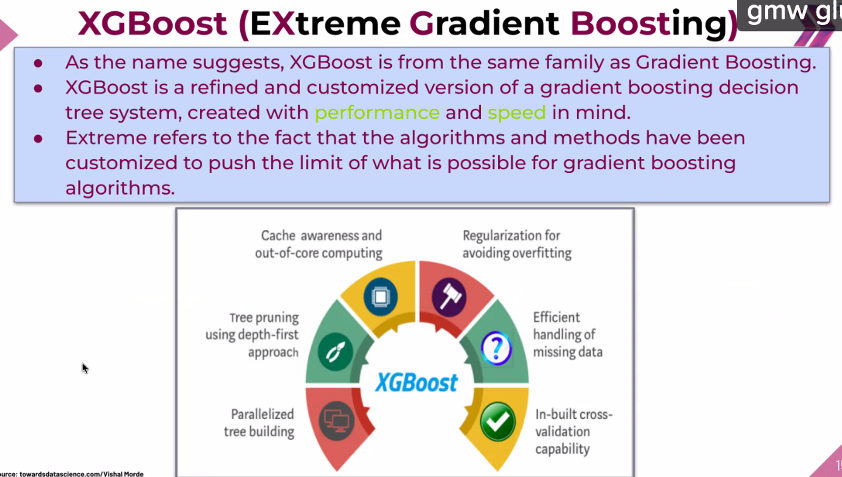

In [ ]:
# "GENELDE" Xgboost daha iyi çalışır.Ancak çalışmaya göre değişir
# XGboost accuracy olarak diğerlerine göre yüksek. Gradient boosting scoru da yakın aama 2069 saniyede halletmiş
# .. Xgboost 24 saniye de halletmiş

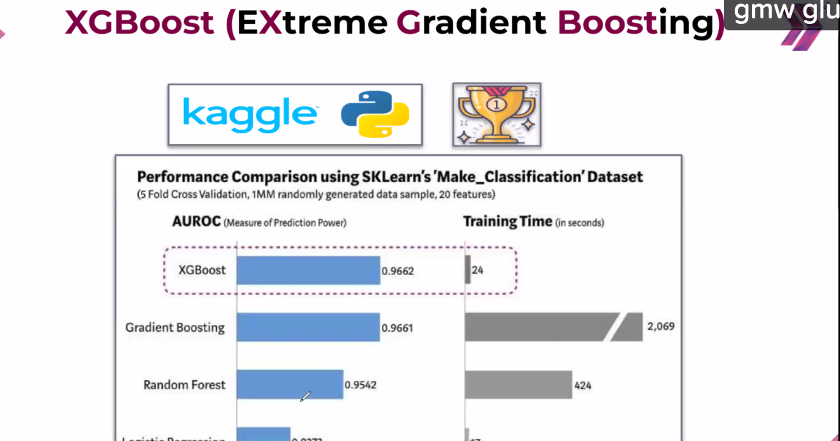

In [ ]:
# n_estimator : 
# Subsample   : Datanın ne kadarını kullansın -- 1.0 seçersek datanın tamamını kullanır

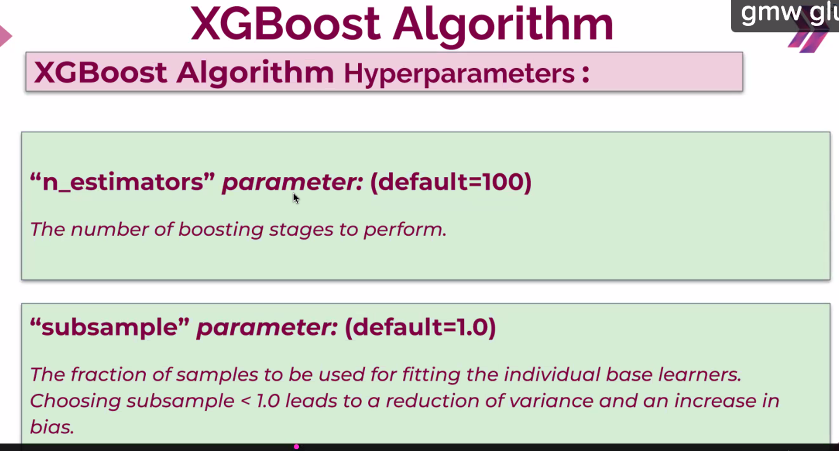

In [ ]:
# max_depth: Bu öncekinde default u 1 idi
# Learning rate: Öğrenme hızı

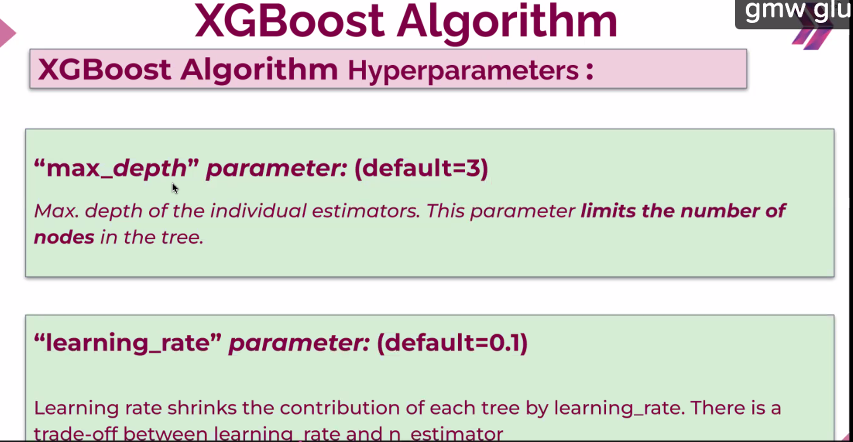

In [ ]:
# Avantajlar
    # Büyük boyutlu dataları iyi handle eder
    # Hızlı tahminler için iyi bir modeldir
    # Feature importance
    # Model performansı diğer modellere göre "genelde" daha iyidir

# Dezavantajları
    # Görselleştirmede sıkıntı çıkabilir
    # Çok hyperparameter olduğunda tune edilmesi zor

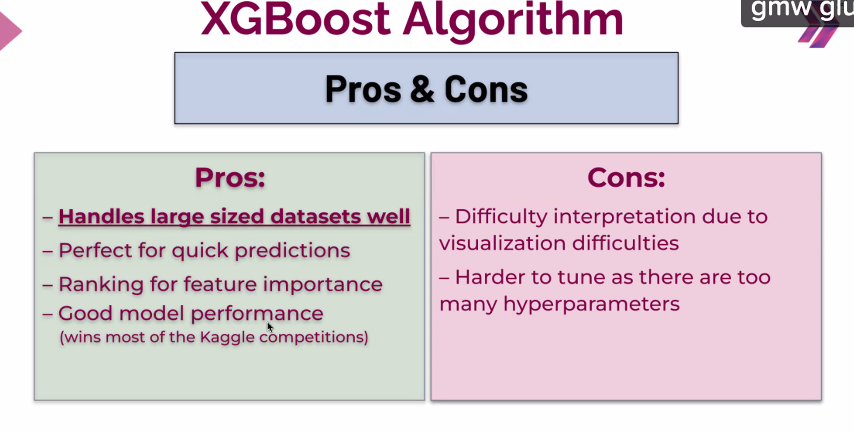

In [ ]:
# 2. ders
# İzlediğimiz işlem adımları hemen hemen aynı

## Adaboosting, Gradient Boosting, XGBoost Classifier

we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv('advertising2.csv')
df.head()
# Reklam ile ilgili data
# Bir sitede reklamlar var. Bu reklamların tıklanıp tıklanmamasını tespit edeceğiz

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

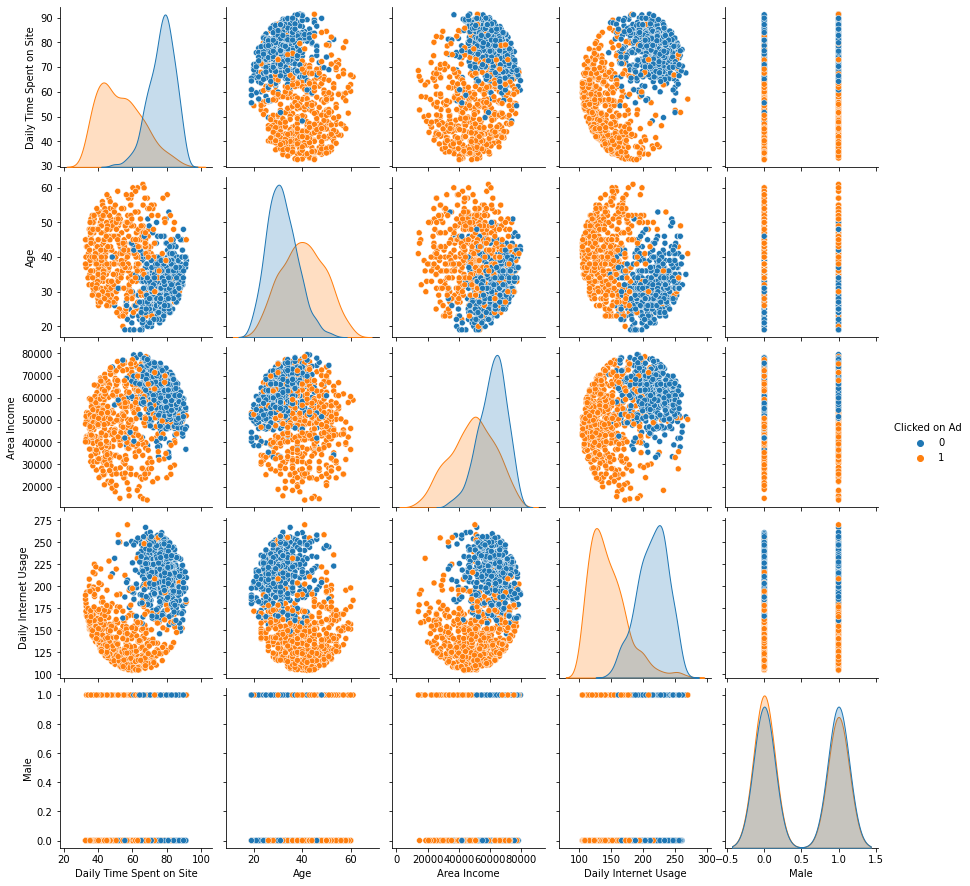

In [5]:
sns.pairplot(df, hue='Clicked on Ad')
# Çok da zor bir data(sınıflandırmanın zor olmadığını) olmadığını söyleyebiliriz

## Train | Test Split

In [6]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(feature, df[feature].nunique())
    
# Her bir kategorik sütunda kaç tane unique değer var

Ad Topic Line 1000
City 969
Country 237
Timestamp 1000


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
cat = df.select_dtypes("object").columns
cat

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [9]:
list(cat)

['Ad Topic Line', 'City', 'Country', 'Timestamp']

In [10]:
cat2 = list(cat) + ['Clicked on Ad']
cat2

['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad']

In [11]:
X = df.drop(columns=cat2)
y = df['Clicked on Ad']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
X_train.head(1)
# Datamızın son hali

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
716                     39.96   35     53898.89                138.52     1

## Modelling and Model Performance

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [15]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [16]:
#base_estimator=DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [17]:
ada_model.fit(X_train,y_train)  # Scale, handle missing values a gerek yok

AdaBoostClassifier(random_state=42)

In [18]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)
# 0.98 e 0.93 fena değil çünkü data sayımız çok az. Sonucun kabul edilebilir olduğunu söyleyebiliriz

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [19]:
# Cross validation
from sklearn.model_selection import cross_val_score, cross_validate
model = AdaBoostClassifier(n_estimators=50, random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Sonuçlar öncekine göre artmış
# Accuracy 0.93 iken 0.96 olmuş, precision 0.95 e 0.96 recal 0.93 e 0.95

test_accuracy     0.960000
test_precision    0.968795
test_recall       0.950505
test_f1           0.958988
dtype: float64

## Tree Visualization

In [20]:
from sklearn.tree import plot_tree

In [21]:
model = AdaBoostClassifier(n_estimators=3, random_state=42) # n_estimators=3 olsun şeklinde tanımlamışız
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

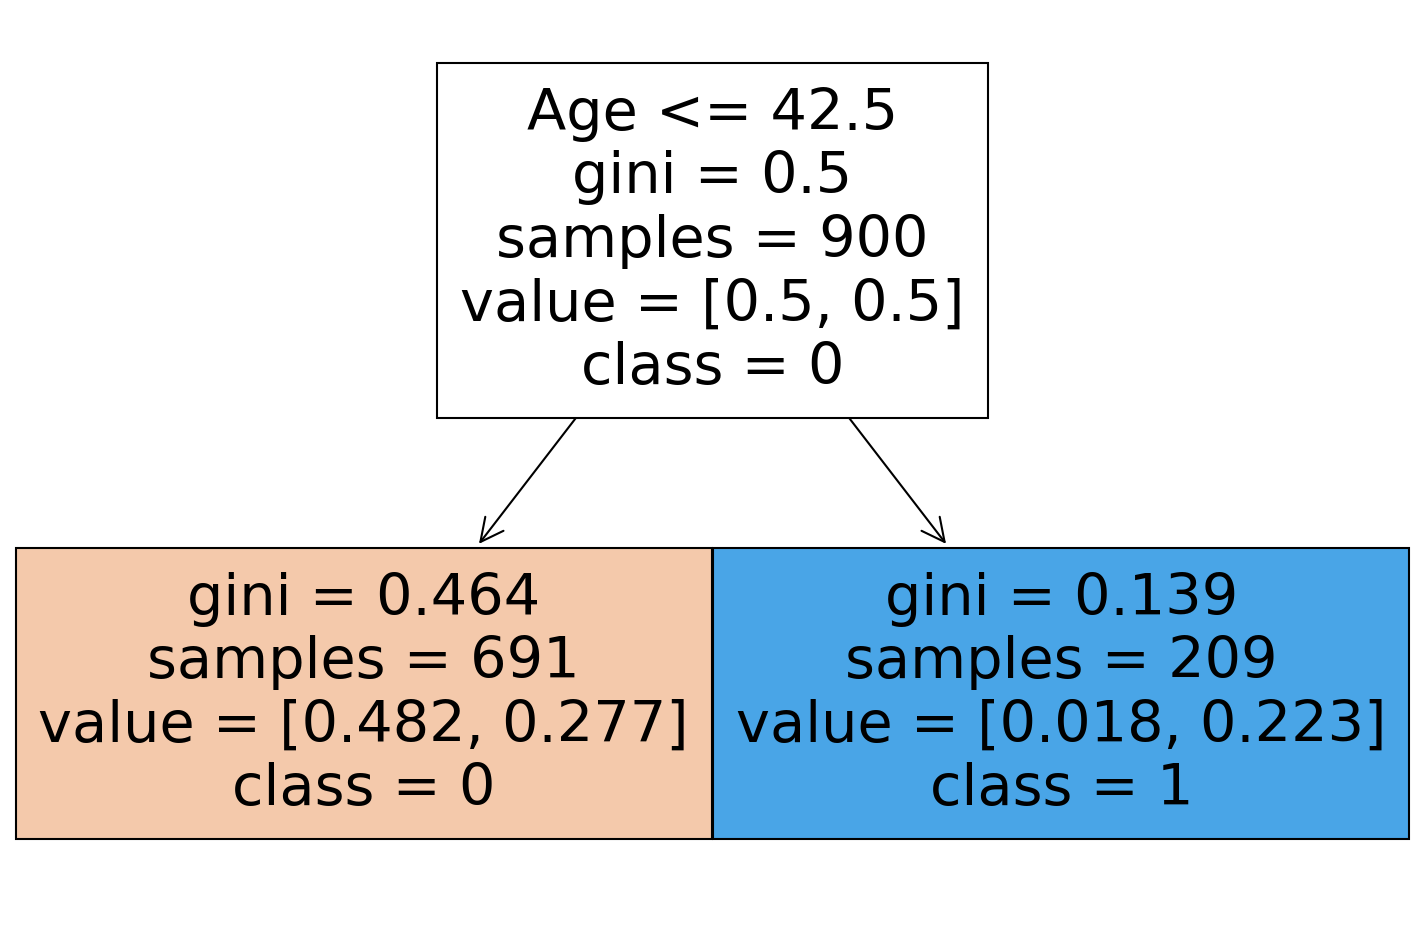

In [23]:
# Normal şartlarda bu adım yok ama ek bilgi olsun, farkındalık olsun diye gösteriyoruz
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns, class_names=targets.unique());
# model.estimators_[2] : 2 nolu ağaç
# Alttaki şekilde de 2 nolu ağacın yapısını görüyoruz
# 1 tane kök 2 tane de dalı var. Bu bir stump
# Görmek istersek diğer stumplara bakabiliriz model.estimators_ kısmını değiştirerek

# Orion Hoca: ize ağaçların yapısını göstermek için koydyuğumuz bir şey
# .. canınız 100 ağaç kurdunuz arada nasıl ağaçlar kuruluyor bakabilirsiniz, merakınız var ise (edited) 
# .. ama DT için aynısı geçerli değil eğer büyük bir ağacnız yok ise raporlamada kulalanabilirsiniz

## Gridsearch

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
model = AdaBoostClassifier(random_state=42)

In [31]:
param_grid = {"n_estimators": [20, 30, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}
# John Hoca: "learning_rate" genelde 0.01 ile 1.0 arasındadır. Bu aralık genelde idealdir

In [32]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'f1') # f1 i yükseltmeye çalışıyor

In [33]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 30, 100, 200]},
             scoring='f1')

In [34]:
ada_grid_model.best_params_ # Sınırlarda çıkarsa sonuçlar tekrar hyperparametrelerin range ini değiştirebiliriz

{'learning_rate': 0.1, 'n_estimators': 100}

In [35]:
ada_grid_model.best_score_

0.969132103588408

In [36]:
y_pred = ada_grid_model.predict(X_test)
y_pred_proba = ada_grid_model.predict_proba(X_test)

# Biraz sonra her bir modeli kıyaslamak için f1,recall,auc u bir değişkene atayalım
ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:,1])
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

# Önceki f1 imiz de 0.94. Buradaki de 0.94. Demekki bu kadar iyileşiyor

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



## Feature_importances

In [37]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42) # En iyi hyperparametrelere göre model
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance", ascending = False)
ada_imp_feats
# Cinsiyetin önemli olmadığını görüyoruz

ada_importance
Daily Internet Usage                0.29
Daily Time Spent on Site            0.28
Age                                 0.22
Area Income                         0.21
Male                                0.00

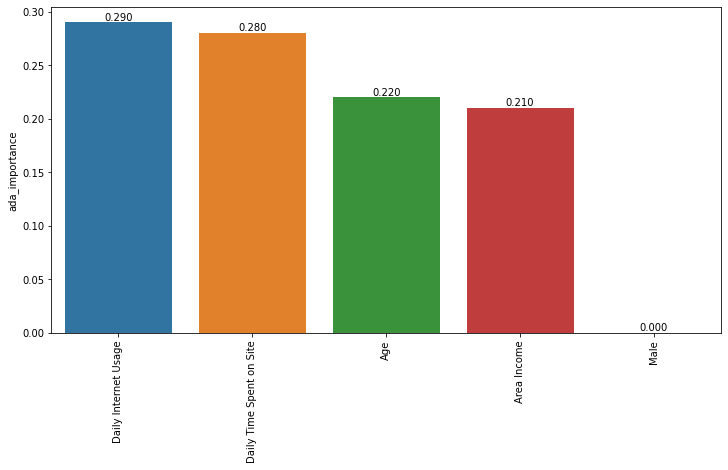

In [39]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation=90);


## Evaluating ROC Curves and AUC

In [40]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

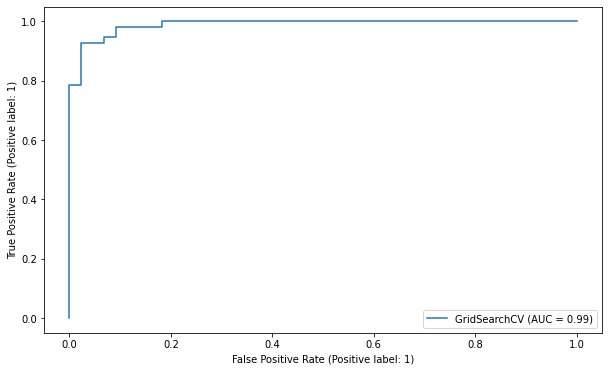

In [41]:
plot_roc_curve(ada_grid_model, X_test, y_test)
# Binary classification olduğu için ROC curve çizdirebiliriz

## Gradient Boosting Modelling and Model Performance

In [ ]:
# Aynı şeyleri gradient boosting için yapalım

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
grad_model = GradientBoostingClassifier(random_state=42)

In [48]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [49]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)
# Daha iyi sonuçlar bir öncekine göre ama Cross validation a bakmalıyız

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [50]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                            'f1', 'roc_auc'], cv = 10,)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Sonuçlar yakın

test_accuracy     0.952222
test_precision    0.958870
test_recall       0.945960
test_f1           0.951603
test_roc_auc      0.987972
dtype: float64

## Gridsearch

In [51]:
param_grid = {"n_estimators":[100, 200, 300], "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4], 
              "learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]} #0.8

# "subsample": Ana datadan alınacak örnek oranı

In [52]:
gb_model = GradientBoostingClassifier(random_state = 42)

In [53]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, max_features=None, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.001, 

In [54]:
grid.best_params_ # Bazı parametreler sınırda gelmiş. Aralıkları değiştirerek daha iyi sonuçlar bulabiliriz

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [55]:
grid.best_estimator_

GradientBoostingClassifier(max_features=3, random_state=42, subsample=0.5)

In [56]:
grid.best_score_

0.9658340599400116

In [57]:
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(grid, X_train, y_train, X_test, y_test)

# Performans arttı

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[456   0]
 [  4 440]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       456
           1       1.00      0.99      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Feature importances

In [58]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance", ascending=False)
grad_imp_feats

# Feature importance lar değişti. Bu yapı için bu feature ların önemi bu şekilde
# Hangi modeli kullanacaksam ona göre feature importance a bakıp ona göre featureları kullanmalıyım

# Class chat soru: yani feature importance lar çok farklı olsa da model performansları benzer olabilir değil mi?
# John hoca: Performanslar aynı olabilir ama kullandıkları yapı farklı. Model tabanlı değerlendirilmeli
# Orion hoca: feature importance modele has birşey .. her modelden farklı importance alabilirsiniz

grad_importance
Daily Internet Usage             0.551346
Daily Time Spent on Site         0.319058
Area Income                      0.074586
Age                              0.053003
Male                             0.002008

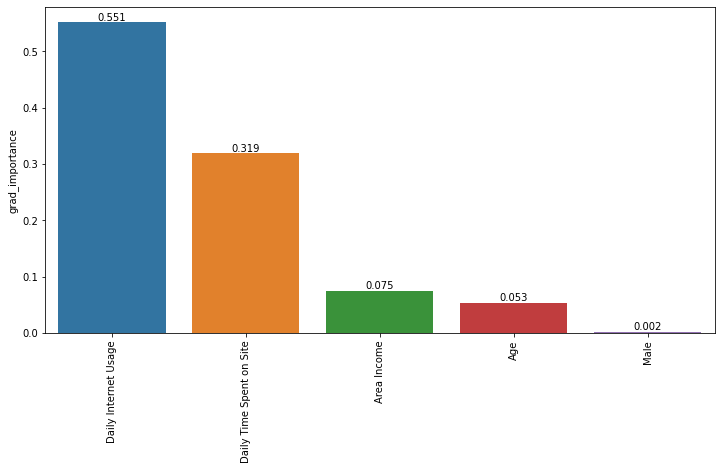

In [59]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

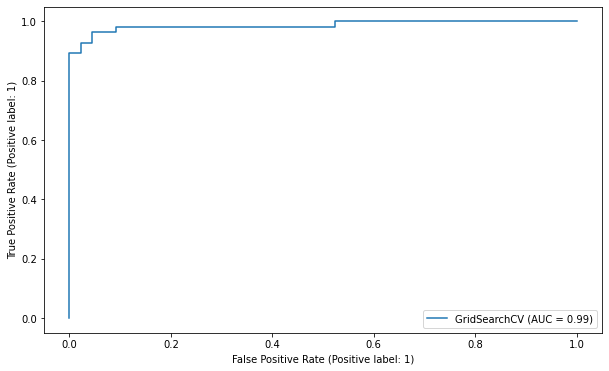

In [60]:
plot_roc_curve(grid, X_test, y_test);

## XG Boosting Modelling and Model Performance

In [ ]:
# pip install xgboost==0.90  # XGboost un versionu 0.90 olanını yükleminizi tavsiye ediyoruz
# Daha önce farklı sonuçlarla karşılaşan arkadaşlar oldu çünkü önceki versiyonda default parametreleri
# ... farklı olabiliyor şuandaki versiyonu ile

In [ ]:
import xgboost as xgb
xgb.__version__    # Versiyonu kontrol etmek için kullanılan kod

'0.90'

In [ ]:
# Aynı işlemleri tekrar ediyoruz

In [61]:
from xgboost import XGBClassifier

In [62]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

In [63]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[454   2]
 [  7 437]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



In [64]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.957778
test_precision    0.968757
test_recall       0.945909
test_f1           0.956573
test_roc_auc      0.988441
dtype: float64

## Gridsearch

In [70]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

# "colsample_bytree": Column ların 0.5 ini 0.7 sini alsın vs...

# class chat soru: colsample_bytree yi tekrar edebilir misiniz hocam
# John hoca: Feature sayısını hangi oranda alsın

###### Class chat
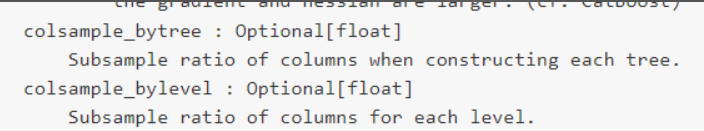

In [71]:
xgb_model = XGBClassifier(random_state=42)

In [72]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree

In [73]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [74]:
xgb_grid.best_estimator_

XGBClassifier(colsample_bytree=0.5, random_state=42)

In [75]:
xgb_grid.best_score_

0.969269374396047

In [76]:
y_pred = xgb_grid.predict(X_test)
y_pred_proba = xgb_grid.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

# Değerlerin biraz daha düşük olduğunu görüyoruz

Test_Set
[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[454   2]
 [ 13 431]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



## Feature importances

In [77]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)
xgb_imp_feats

xgb_importance
Daily Internet Usage            0.467174
Daily Time Spent on Site        0.301327
Age                             0.122702
Area Income                     0.087656
Male                            0.021141

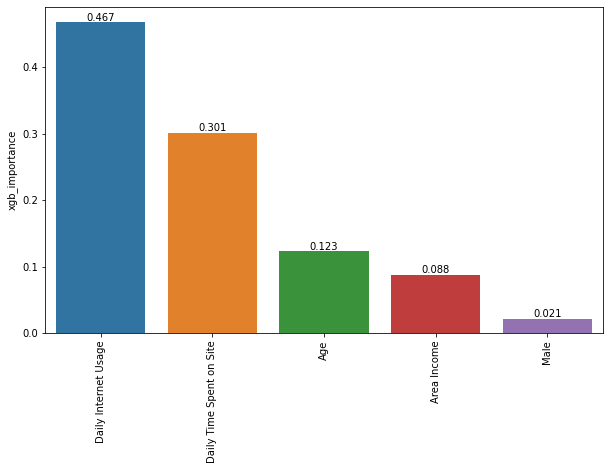

In [78]:
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [79]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)
# Orion Hoca: feature importance model performansından bağımsızdır

ada_importance  grad_importance  xgb_importance
Daily Internet Usage                0.29         0.551346        0.467174
Daily Time Spent on Site            0.28         0.319058        0.301327
Age                                 0.22         0.053003        0.122702
Area Income                         0.21         0.074586        0.087656
Male                                0.00         0.002008        0.021141

## Evaluating ROC Curves and AUC

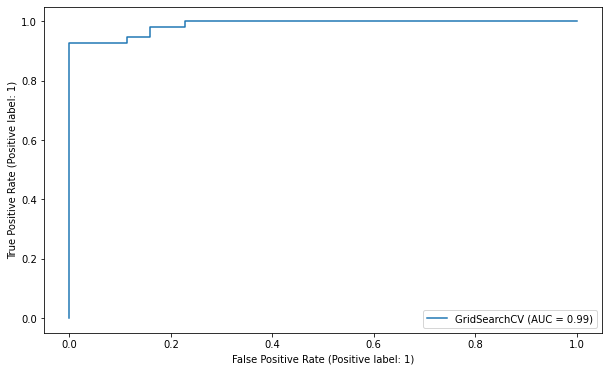

In [80]:
plot_roc_curve(xgb_grid, X_test, y_test);

## Random Forest

In [ ]:
# Random forest bir bagging yöntemiydi(class chat: Tree based - ensemble- bagging)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred_proba[:,1])
eval_metric(rf_model, X_train, y_train, X_test, y_test)
# Default değerlerle sonuçlar

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)

dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[38  6]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.90      0.96      0.93        56

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Logistic Regression

In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [85]:
scaler = MinMaxScaler()  # Datanın durumuna göre scaling uyguluyorduk. 
# Datanın değerleri arasında fark var mı diye bakarsak describe da
# Age ile Area Income değerleri arasında uçurum var mesela. O yüzden scaling yapmak şart

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred_proba[:,1])
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[43  1]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.95      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[451   5]
 [ 22 422]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       456
           1       0.99      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)

knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[454   2]
 [ 24 420]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       1.00      0.95      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## SVM

In [90]:
from sklearn.svm import SVC

In [91]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)

svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

# probability= : ROC curve çizdirebilmek için buna True demeliydik

Test_Set
[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100


Train_Set
[[450   6]
 [ 17 427]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.97       444

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



## Comparing Models

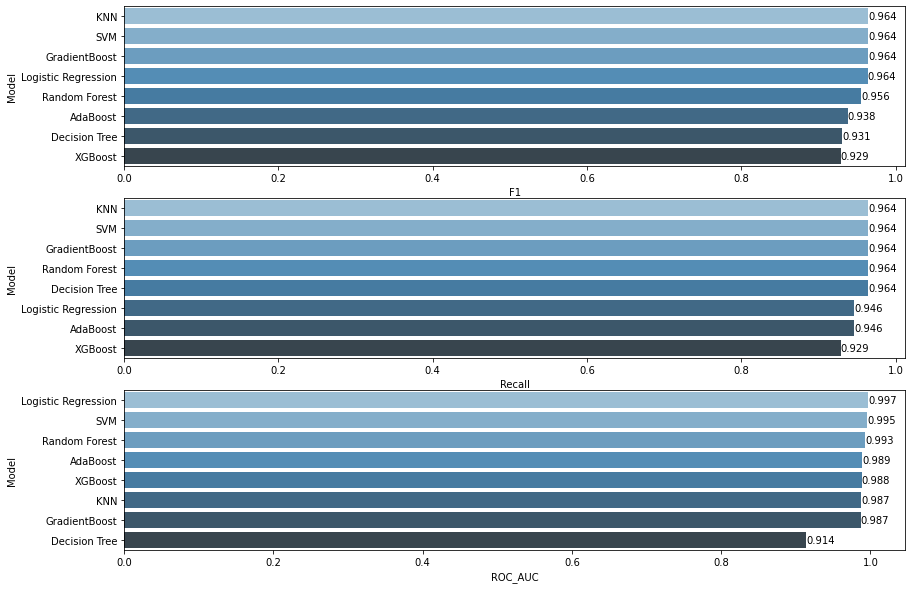

In [92]:
# 8 modelimizi aldık, f1,recall,ROC_AUC larını alalım ve bu skorları görsel olarak çizdirelim

compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, 
                                   xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    ax.bar_label(ax.containers[0],fmt="%.3f")
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# XGBoost burada kötü performans göstermiş F1 de
# Recall da da benzer sonuçlar var

# Class chat soru: XGBoos data sayısı az olduğu için performansı kötü çıkmış olabilir mi? --John Hoca: Genel öyle olabiliyor
# Orion Hoca: logistic bir datadan iyi sonuç alıyorsa ki burda almış model linear bir yüzey ile ayrılabiliyor demektir. fazla advance bir model kullanmaya gerek yok

# Bir çok model denenir ve hangi model iyi çalışıyorsa o seçilir. Siz de bu şekilde yapıp rapor sunmalısınız

In [ ]:
# Class chat soru: hocam csv yi değiştirsek tüm notebook u çalıştırsak. böyle birşey yapılabilir mi. kolaycılık mı olur. yanlış mı olur
# John Hoca: Evet olabilir. pycaret ı da kullanabilirsiniz
# John hoca: Data science, Feature enginneringtir. Yoksa modelleri yapmakta bir şey yok. Al fit et tahmin yap ...
# .. Deep learningte feature enginnering yapacağız. Tarih datasından çok feature engineering yapılır. Harcama miktarından yapılır yine